<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Analitika_bolshih_dannyh/Praktika_PySpark_2/DZ_Kondratev_Spark_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнее задание «Практика PySpark (часть 2)»

**Преподаватель:** Алексей Кузьмин

Обучите модель классификации для цветков Iris.
Примерная последовательность действий:

1. [Взять данные.](https://drive.google.com/file/d/18ksAxTxBkp15LToEg46BHhwp3sPIoeUU/view?usp=sharing![изображение_2024-02-08_151549849.png](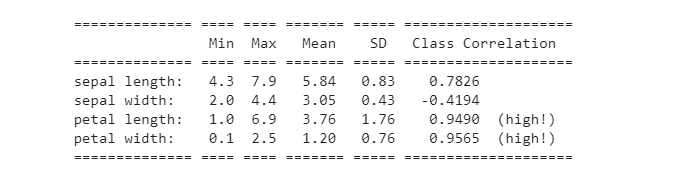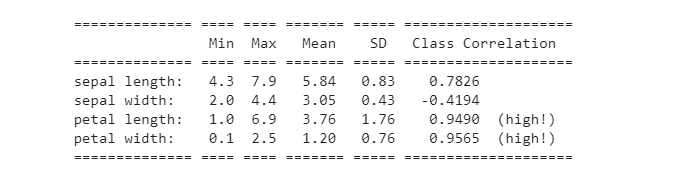))
2. Загрузить в PySpark.
3. При помощи VectorAssembler преобразовать все колонки с признаками в одну (использовать Pipeline — опционально).
4. Разбить данные на train и test.
5. Создать модель логистической регреcсии или модель дерева и обучить её.
6. Воспользоваться MulticlassClassificationEvaluator для оценки качества на train и test множестве.

Установка Spark

In [ ]:
# Обновляем пакеты системы с помощью apt-get update
!apt-get update

In [ ]:
# Устанавливаем OpenJDK 8 с помощью apt-get install.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Скачиваем архив Spark с официального сайта с помощью wget.
!wget -q https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz

In [ ]:
# Распаковываем архив Spark с помощью tar -xvf.
!tar -xvf spark-3.4.2-bin-hadoop3.tgz

In [ ]:
# Устанавливаем findspark с помощью pip install.
!pip install -q findspark

In [ ]:
# Устанавливаем переменные окружения JAVA_HOME и SPARK_HOME для работы с Spark.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.2-bin-hadoop3"

In [ ]:
# Инициализируем findspark для работы с Spark.
import findspark
findspark.init()

# Создаем экземпляр SparkSession для работы с Spark.
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Получаем контекст SparkContext для работы с Spark.
sc = spark.sparkContext

### Загрузите данные при помощи spark.read.csv из приложенного файла


Набор данных растений ириса


**Характеристики набора данных:**

    :Количество экземпляров: 150 (по 50 в каждом из трёх классов)
    :Количество атрибутов: 4 числовых, прогнозируемых атрибута и класс.
    :Информация об атрибутах:
        - sepal length - длина чашелистика в см
        - sepal width - ширина чашелистика в см
        - petal length - длина лепестка в см
        - petal width - ширина лепестка в см
        - Класс:
                - 0-Setosa
                - 1-Versicolour
                - 2-Virginica


In [1]:
# Читаем данные из файла 'iris.CSV' в датафрейм Spark.
df = spark.read.csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Analitika_bol'shih_dannyh/Praktika_PySpark_2/iris.CSV')

SyntaxError: unterminated string literal (detected at line 2) (<ipython-input-1-ff8e961705f7>, line 2)

In [ ]:
# Отображаем первые 5 строк датафрейма.
df.show(5)

### Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка

(`sepal_length`,`sepal_width`,`petal_length`,`petal_width`)

In [ ]:
# Создаем новый датафрейм df_grp, группируя исходный датафрейм df по столбцу 'variety'.
df_grp = df.groupBy('variety')

In [ ]:
# Создаем новый датафрейм df_max, вычисляя максимальные значения для столбцов для каждой группы в df_grp.
df_max = df_grp.max('sepal_length','sepal_width','petal_length','petal_width')
df_max.show()

In [ ]:
# Создаем новый датафрейм df_min, вычисляя минимальные значения для столбцов для каждой группы в df_grp.
df_min = df_grp.min('sepal_length','sepal_width','petal_length','petal_width')
df_min.show()

In [ ]:
# Создаем новый датафрейм df_avg, вычисляя средние значения для столбцов для каждой группы в df_grp.
df_avg = df_grp.avg('sepal_length','sepal_width','petal_length','petal_width')
df_avg.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

### График Зависимости длины и ширины чашелистиков

In [ ]:
# Отображение точек для каждого класса с уникальными цветами
df_pd = df.toPandas()
plt.scatter(df_pd[df_pd['variety_num']==0]['sepal_length'], df_pd[df_pd['variety_num']==0]['sepal_width'], label='Setosa', c='r')
plt.scatter(df_pd[df_pd['variety_num']==1]['sepal_length'], df_pd[df_pd['variety_num']==1]['sepal_width'], label='Versicolor', c='g')
plt.scatter(df_pd[df_pd['variety_num']==2]['sepal_length'], df_pd[df_pd['variety_num']==2]['sepal_width'], label='Virginica', c='b')

plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Ширина чашелистика (см)')
plt.title('Зависимость длины и ширины чашелистиков')

plt.legend()
plt.show()

In [ ]:
df_pd.head(5)

### Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

In [ ]:
# Зависимость длины и ширины лепестков
plt.scatter(df_pd[df_pd['variety_num']==0]['petal_length'], df_pd[df_pd['variety_num']==0]['petal_width'], label='Setosa', c='r')
plt.scatter(df_pd[df_pd['variety_num']==1]['petal_length'], df_pd[df_pd['variety_num']==1]['petal_width'], label='Versicolor', c='g')
plt.scatter(df_pd[df_pd['variety_num']==2]['petal_length'], df_pd[df_pd['variety_num']==2]['petal_width'], label='Virginica', c='b')

plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.title('Зависимость длины и ширины лепестков')

plt.legend()
plt.show()

### Посмотрите внимательно на получившийся график и сформируйте правило
вида:

 ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА `A` < `ЗНАЧЕНИЕ`, ТО `IRIS` ОТНОСИТСЯ К КЛАССУ `SETOSA` - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР `UNKNOWN`)


При помощи команд `withColumn`, `when`, `otherwise` создайте в датафрейме новую колонку с таким предсказанием

In [ ]:
from pyspark.sql.functions import when, col
# Библиотека pyspark.sql.functions предоставляет функции для работы с данными в PySpark.
# Она содержит множество полезных функций, таких как when, col, sum, mean и другие,
# которые позволяют манипулировать данными, выполнять агрегацию, фильтрацию и многое другое.

In [ ]:
# Если значение столбца "petal_length" меньше 2, то в новой колонке "prediction" будет записано "Setosa".
# В противном случае, будет записано "Unknown".

df = df.withColumn("prediction", when(col("petal_length") < 2, "Setosa").otherwise("Unknown"))
df.show(5)

### Проверьте качество своего предсказания
Для этого:

1.   Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2.   Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)





In [ ]:
# Подсчитываем количество строк, где предсказали класс Setosa и правильный класс был так же Setosa.
correct_setosa = df.where(df['prediction'] == 'Setosa').count()

# Подсчитываем количество строк, где предсказали класс Setosa, а правильный класс был какой-то другой.
wrong_setosa = df.where((df['prediction'] == 'Setosa') & (df['variety'] != 'Setosa')).count()

print(f'Количество строк, где предсказали класс Setosa и правильный класс был так же Setosa: {correct_setosa}')
print(f'Количество строк, где предсказали класс Setosa, а правильный класс был какой-то другой: {wrong_setosa}')